In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Import csv file in to dataframe

In [2]:
df = pd.read_csv('C:\\Users\\Jacob Kai\\Documents\\Python_UniClass\\Week 6, 7\\Online Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Check and Clean null values from data

In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df = df.dropna()

### Check and Clean duplicated values from data.

In [5]:
df.duplicated().sum()

5225

In [6]:
df = df.drop_duplicates()

### For every row, caculate Revenue from Quantity and UnitPrice.

In [7]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### Select the specific country (United Kingdom) which we want to analysis.

In [8]:
df_uk = df[df['Country'] == 'United Kingdom']
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [9]:
df_uk = df_uk[df_uk['Revenue'] >= 0]
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [10]:
df_uk['Revenue'].sum()

7285024.644

In [11]:
df_uk_Re_check = df_uk.groupby('CustomerID')['Revenue'].sum().sort_values().reset_index()
df_uk_Re_check

,CustomerID,Revenue
0,13256.0,0.00
1,16738.0,3.75
2,14792.0,6.20
3,16454.0,6.90
4,17956.0,12.75
...,...,...
3916,16029.0,80850.84
3917,17511.0,91062.38
3918,16446.0,168472.50
3919,17450.0,194390.79


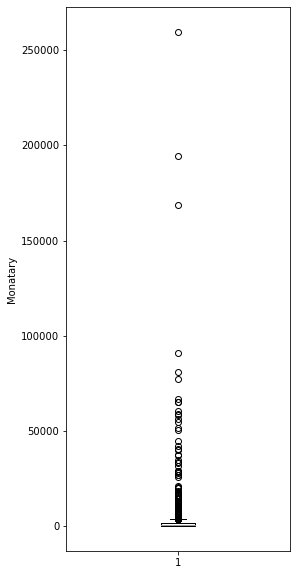

In [12]:
plt.figure(figsize=(4, 10))
plt.boxplot(x = df_uk_Re_check['Revenue'])
plt.ylabel('Monatary')
plt.show()

### To filter those people with high Monetary values. i decided to isolate/ separate those who had spent at least 1% of total Monetary values.

In [13]:
vip = df_uk_Re_check[df_uk_Re_check['Revenue'] >= (df_uk_Re_check['Revenue'].sum() * 0.01)]
vip

,CustomerID,Revenue
3915,12346.0,77183.60
3916,16029.0,80850.84
3917,17511.0,91062.38
3918,16446.0,168472.50
3919,17450.0,194390.79
3920,18102.0,259657.30


In [14]:
VIP_ID_uk = vip['CustomerID'].tolist()
VIP_ID_uk

[12346.0, 16029.0, 17511.0, 16446.0, 17450.0, 18102.0]

### Remove vip customers from the dataset

In [15]:
for i in VIP_ID_uk:
    df_uk = df_uk[df_uk['CustomerID'] != i]
    
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


### Select the columns we need and create a new dataframe

In [16]:
df_uk = df_uk[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Revenue']]
df_uk

,CustomerID,InvoiceNo,InvoiceDate,Revenue
0,17850.0,536365,2010-12-01 08:26:00,15.30
1,17850.0,536365,2010-12-01 08:26:00,20.34
2,17850.0,536365,2010-12-01 08:26:00,22.00
3,17850.0,536365,2010-12-01 08:26:00,20.34
4,17850.0,536365,2010-12-01 08:26:00,20.34
...,...,...,...,...
541889,15804.0,581585,2011-12-09 12:31:00,23.40
541890,13113.0,581586,2011-12-09 12:49:00,23.60
541891,13113.0,581586,2011-12-09 12:49:00,30.00
541892,13113.0,581586,2011-12-09 12:49:00,214.80


### Check and change the values of InvoiceDate to datetime

In [17]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347252 entries, 0 to 541893
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   347252 non-null  float64
 1   InvoiceNo    347252 non-null  object 
 2   InvoiceDate  347252 non-null  object 
 3   Revenue      347252 non-null  float64
dtypes: float64(2), object(2)
memory usage: 13.2+ MB


In [18]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])

C:\Users\JACOBK~1\AppData\Local\Temp/ipykernel_15276/3737500743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])


In [19]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347252 entries, 0 to 541893
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   347252 non-null  float64       
 1   InvoiceNo    347252 non-null  object        
 2   InvoiceDate  347252 non-null  datetime64[ns]
 3   Revenue      347252 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 13.2+ MB


### Create a new dataframe with CustomerID and InvoiceNo.
### Caculate the Frequency

In [20]:
df_uk_InNo = df_uk[['CustomerID', 'InvoiceNo']]
df_uk_InNo

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536365
2,17850.0,536365
3,17850.0,536365
4,17850.0,536365
...,...,...
541889,15804.0,581585
541890,13113.0,581586
541891,13113.0,581586
541892,13113.0,581586


In [21]:
df_uk_InVo = df_uk_InNo.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_uk_InVo.rename(columns = {'InvoiceNo':'Frequency'}, inplace=True)
rfm_F = df_uk_InVo
rfm_F

,CustomerID,Frequency
0,12747.0,11
1,12748.0,210
2,12749.0,5
3,12820.0,4
4,12821.0,1
...,...,...
3910,18280.0,1
3911,18281.0,1
3912,18282.0,2
3913,18283.0,16


### Create a new dataframe with CustomerID and Revenue
### Caculate the Monetary

In [22]:
df_uk_Re = df_uk[['CustomerID', 'Revenue']]
df_uk_Re

,CustomerID,Revenue
0,17850.0,15.30
1,17850.0,20.34
2,17850.0,22.00
3,17850.0,20.34
4,17850.0,20.34
...,...,...
541889,15804.0,23.40
541890,13113.0,23.60
541891,13113.0,30.00
541892,13113.0,214.80


In [23]:
df_uk_Re = df_uk_Re.groupby('CustomerID')['Revenue'].sum().reset_index()
df_uk_Re.rename(columns = {'Revenue':'Monetary'}, inplace=True)
rfm_M = df_uk_Re
rfm_M

,CustomerID,Monetary
0,12747.0,4196.01
1,12748.0,33053.19
2,12749.0,4090.88
3,12820.0,942.34
4,12821.0,92.72
...,...,...
3910,18280.0,180.60
3911,18281.0,80.82
3912,18282.0,178.05
3913,18283.0,2045.53


### Create a new dataframe with CustomerID and InvoiceDate

In [24]:
df_uk_InDt = df_uk[['CustomerID', 'InvoiceDate']]
df_uk_InDt

,CustomerID,InvoiceDate
0,17850.0,2010-12-01 08:26:00
1,17850.0,2010-12-01 08:26:00
2,17850.0,2010-12-01 08:26:00
3,17850.0,2010-12-01 08:26:00
4,17850.0,2010-12-01 08:26:00
...,...,...
541889,15804.0,2011-12-09 12:31:00
541890,13113.0,2011-12-09 12:49:00
541891,13113.0,2011-12-09 12:49:00
541892,13113.0,2011-12-09 12:49:00


### Find out the last day of the InvoiceDate

In [25]:
df_uk_InDt.sort_values(by=['InvoiceDate'], axis=0)

,CustomerID,InvoiceDate
0,17850.0,2010-12-01 08:26:00
1,17850.0,2010-12-01 08:26:00
2,17850.0,2010-12-01 08:26:00
3,17850.0,2010-12-01 08:26:00
4,17850.0,2010-12-01 08:26:00
...,...,...
541879,15804.0,2011-12-09 12:31:00
541892,13113.0,2011-12-09 12:49:00
541890,13113.0,2011-12-09 12:49:00
541891,13113.0,2011-12-09 12:49:00


### Caculate the Recency

In [26]:
PRESENT = pd.datetime(2011,12,10)
PRESENT

C:\Users\JACOBK~1\AppData\Local\Temp/ipykernel_15276/3900976334.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  PRESENT = pd.datetime(2011,12,10)


datetime.datetime(2011, 12, 10, 0, 0)

In [27]:
df_uk_InDt['Recency'] = PRESENT - df_uk_InDt['InvoiceDate']
df_uk_InDt

C:\Users\JACOBK~1\AppData\Local\Temp/ipykernel_15276/941292742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk_InDt['Recency'] = PRESENT - df_uk_InDt['InvoiceDate']


,CustomerID,InvoiceDate,Recency
0,17850.0,2010-12-01 08:26:00,373 days 15:34:00
1,17850.0,2010-12-01 08:26:00,373 days 15:34:00
2,17850.0,2010-12-01 08:26:00,373 days 15:34:00
3,17850.0,2010-12-01 08:26:00,373 days 15:34:00
4,17850.0,2010-12-01 08:26:00,373 days 15:34:00
...,...,...,...
541889,15804.0,2011-12-09 12:31:00,0 days 11:29:00
541890,13113.0,2011-12-09 12:49:00,0 days 11:11:00
541891,13113.0,2011-12-09 12:49:00,0 days 11:11:00
541892,13113.0,2011-12-09 12:49:00,0 days 11:11:00


In [28]:
df_uk_InDt = df_uk_InDt.groupby('CustomerID')['Recency'].min().dt.days.reset_index()
rfm_R = df_uk_InDt
rfm_R

,CustomerID,Recency
0,12747.0,2
1,12748.0,0
2,12749.0,3
3,12820.0,3
4,12821.0,214
...,...,...
3910,18280.0,277
3911,18281.0,180
3912,18282.0,7
3913,18283.0,3


### Combine 3 dataframe (rfm_F, rfm_R, rfm_M) by pandas.merge( )

In [29]:
df_uk_rfm = rfm_F

for i in [rfm_R, rfm_M]:
    df_uk_rfm = pd.merge(df_uk_rfm, i,  on=['CustomerID'])
    
df_uk_rfm

,CustomerID,Frequency,Recency,Monetary
0,12747.0,11,2,4196.01
1,12748.0,210,0,33053.19
2,12749.0,5,3,4090.88
3,12820.0,4,3,942.34
4,12821.0,1,214,92.72
...,...,...,...,...
3910,18280.0,1,277,180.60
3911,18281.0,1,180,80.82
3912,18282.0,2,7,178.05
3913,18283.0,16,3,2045.53


### To reduce the bias of each columns data, the data needs to be standardized.
### Sklearn.preprocessing library - StandardScaler( ) method can standardize data
### Before using machine learning model, we need to use .fit( ) function to train the machine learning model

In [30]:
rfm1 = df_uk_rfm[['Frequency','Recency', 'Monetary']]

scaler = StandardScaler()
scaler.fit(rfm1)
rfm_uk_st = scaler.fit_transform(rfm1)

rfm_uk_st

array([[ 0.96465613, -0.90238954,  0.61445362],
       [29.19821564, -0.92249456,  7.54661066],
       [ 0.11339303, -0.89233702,  0.58919898],
       ...,
       [-0.31223852, -0.85212697, -0.3507526 ],
       [ 1.67404205, -0.89233702,  0.09785896],
       [-0.17036134, -0.50028903,  0.04783253]])

### Caculate Within Sum of Squares to choose the optimal value of K (Elbow Method)

In [31]:
WCSS=[]
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(rfm_uk_st)
    WCSS.append(kmeans.inertia_)

### From the plot below, we can see the optimal value of K is 4

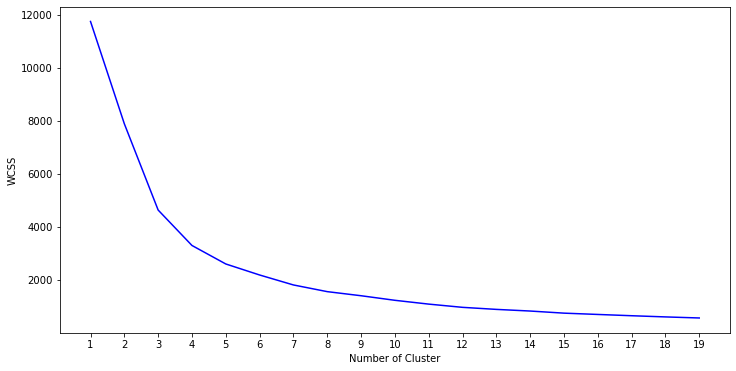

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 20), WCSS, c='blue')
plt.xlabel('Number of Cluster')
plt.xticks(np.arange(1, 20, step=1))
plt.ylabel('WCSS')
plt.show()

### Cluster data with Frequency, Recency and Monetary by K-means
### Apply unsupervised machine learning algorithms Sklearn.cluster.KMeans( ) to the data
### Create a column for noting each customer's cluster number

In [33]:
kmeans_fnl = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(rfm_uk_st)
k_kmeans = kmeans_fnl.fit_predict(rfm_uk_st)
df_uk_rfm['Cluster'] = k_kmeans

In [34]:
df_uk_rfm

,CustomerID,Frequency,Recency,Monetary,Cluster
0,12747.0,11,2,4196.01,2
1,12748.0,210,0,33053.19,3
2,12749.0,5,3,4090.88,0
3,12820.0,4,3,942.34,0
4,12821.0,1,214,92.72,1
...,...,...,...,...,...
3910,18280.0,1,277,180.60,1
3911,18281.0,1,180,80.82,1
3912,18282.0,2,7,178.05,0
3913,18283.0,16,3,2045.53,2


### Visualize the final result

<IPython.core.display.Javascript object>


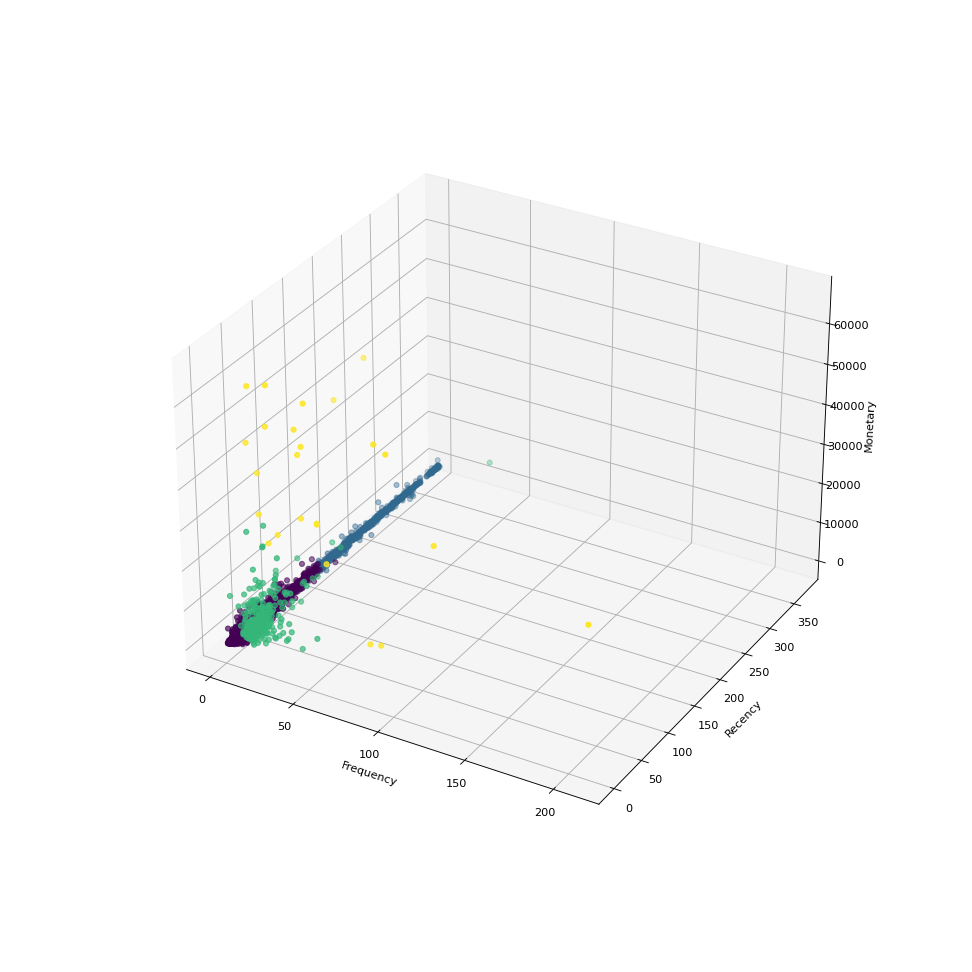

In [35]:
%matplotlib notebook
plt.figure(figsize=(12, 12))
ax = plt.axes(projection ="3d")
xline = df_uk_rfm['Frequency']
yline = df_uk_rfm['Recency']
zline = df_uk_rfm['Monetary']
ax.scatter3D(xline, yline, zline, c=df_uk_rfm['Cluster'])
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')
plt.show()

### Caculate mean, minium and maxium vlaues of each Frequency, Recency and Monetary in every cluster

In [36]:
df_uk_rfm.groupby('Cluster').agg({
    'Frequency' : ['mean','min','max'],
    'Recency' : ['mean','min','max'],
    'Monetary' : ['mean','min','max','count']
})

Frequency              Recency                Monetary            \
              mean min  max        mean  min  max          mean       min   
Cluster                                                                     
0         3.379050   1   13   43.977769    0  156   1115.765325      0.00   
1         1.556477   1   12  246.294301  142  373    433.756094      3.75   
2        17.224265   3   55   16.029412    0  372   7320.703088   1296.44   
3        53.791667   3  210   21.625000    0  235  43431.674583  11189.91   

                         
              max count  
Cluster                  
0         7123.62  2654  
1         7832.47   965  
2        28754.11   272  
3        66653.56    24